# 1.Hierarchical Clustering

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
# Import Dataset
airline = pd.read_csv(r'C:\Users\HP\Downloads\Excel Downloaded files\EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
airline2_norm = norm_func(airline2)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1.00
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.50
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.50
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.50
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.75
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1.00
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.50
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1.00


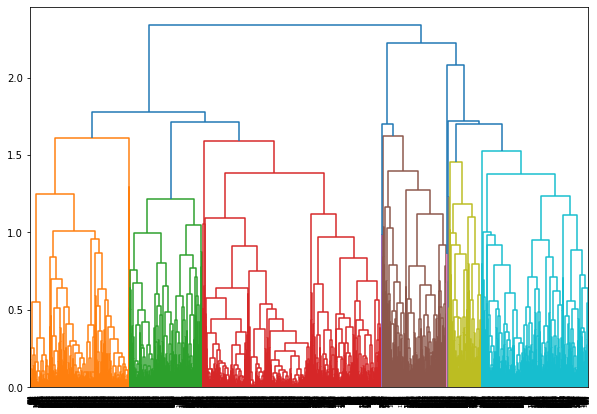

In [14]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [15]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [16]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    973
4    853
3    830
2    692
0    651
Name: clustersid, dtype: int64

In [17]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [18]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,81473.245776,271.998464,1.150538,1.035330,1.003072,8200.086022,9.838710,795.416283,2.626728,4345.599078,1.0
1,1,23512.060637,48.023638,1.108941,1.034943,1.001028,4441.123330,8.328880,193.512847,0.504625,3705.713258,0.0
2,2,115156.202312,65.611272,3.411850,1.001445,1.030347,29163.585260,16.895954,211.744220,0.595376,4553.817919,0.0
3,3,109272.874699,215.253012,3.846988,1.000000,1.030120,45145.377108,20.444578,906.196386,2.578313,4844.255422,1.0
4,4,56308.104338,150.589683,1.001172,1.000000,1.000000,1466.479484,3.781946,275.485346,0.867526,3356.976553,0.0


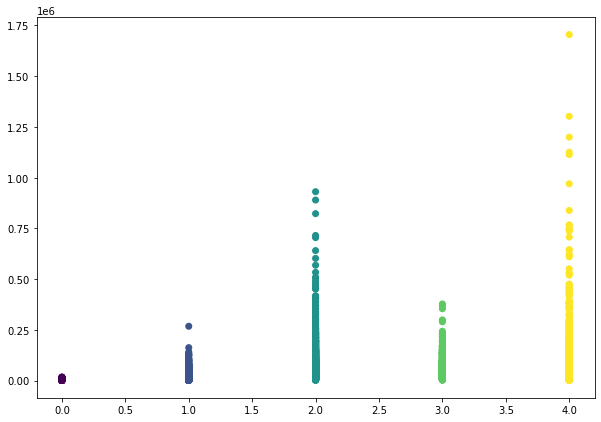

In [11]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_) 

# K-Means Clustering

In [24]:
# Import Dataset
airline = pd.read_csv(r'C:\Users\HP\Downloads\Excel Downloaded files\EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [32]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [34]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [35]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline.iloc[:,1:])

In [36]:
from sklearn.cluster import KMeans

In [37]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [38]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

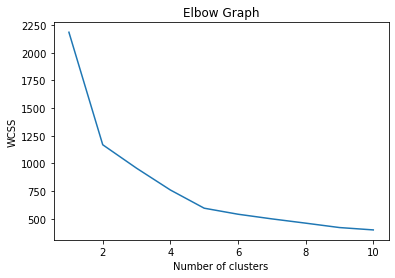

In [39]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [41]:
clusters5.labels_

array([3, 0, 0, ..., 1, 3, 0])

In [42]:
# Assign clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [43]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[ 1.46591144e-02,  4.21869779e-03,  3.48712446e-02,
         1.01931330e-02,  2.14592275e-03,  1.58311212e-02,
         9.63294740e-02,  6.51457496e-03,  9.83885335e-03,
         4.75817489e-01, -4.99600361e-16,  3.81974249e-01],
       [ 6.33316742e-02,  1.77692385e-02,  7.28059333e-01,
         6.18046972e-04,  7.72558714e-03,  1.73294853e-01,
         2.35145313e-01,  2.31316067e-02,  4.03712946e-02,
         5.87029568e-01,  1.00000000e+00,  4.99381953e-01],
       [ 6.93205182e-02,  6.57956135e-03,  6.45395800e-01,
         8.07754443e-04,  5.65428110e-03,  1.18973399e-01,
         2.00247962e-01,  7.26022285e-03,  1.18267443e-02,
         5.33017620e-01, -4.99600361e-16,  5.93295638e-01],
       [ 3.28468247e-02,  1.21842845e-02,  1.24095140e-02,
         7.75594623e-03,  0.00000000e+00,  9.58412998e-03,
         5.58067387e-02,  8.19468726e-03,  1.50045853e-02,
         3.99085919e-01, -3.33066907e-16,  9.79317477e-01],
       [ 4.92188584e-02,  2.60930585e-02,  3.9062500

In [45]:
# Group data by Clusters (K=5)
airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,24991.415236,47.030043,1.139485,1.020386,1.008584,4174.429185,8.284335,200.759657,0.521459,3948.430258,0.0
1,1,107970.244747,198.091471,3.912237,1.001236,1.030902,45695.253399,20.222497,712.846724,2.139679,4870.823239,1.0
2,2,118180.253635,73.348950,3.581583,1.001616,1.022617,31371.500808,17.221325,223.738288,0.626817,4422.848142,0.0
3,3,55998.514995,135.830403,1.049638,1.015512,1.000000,2527.191313,4.799380,252.535677,0.795243,3312.018614,0.0
4,4,83910.180060,290.885417,1.156250,1.032738,1.002976,8692.647321,10.437500,1031.645833,3.153274,4329.197917,1.0


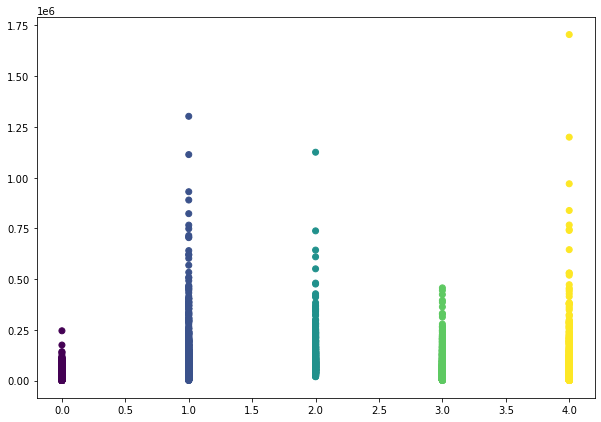

In [47]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_) 

In [48]:
# Cluster algorithm using K=6
clusters6=KMeans(6,random_state=30).fit(airline2_norm)
clusters6

KMeans(n_clusters=6, random_state=30)

In [49]:
clusters6.labels_

array([3, 0, 0, ..., 1, 3, 0])

In [50]:
# Assign clusters to the data set
airline6=airline2.copy()
airline6['clusters6id']=clusters6.labels_
airline6

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters6id
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [51]:
# Compute the centroids for K=6 clusters with 11 variables
clusters6.cluster_centers_

array([[ 1.46591144e-02,  4.21869779e-03,  3.48712446e-02,
         1.01931330e-02,  2.14592275e-03,  1.58311212e-02,
         9.63294740e-02,  6.51457496e-03,  9.83885335e-03,
         4.75817489e-01, -4.99600361e-16,  3.81974249e-01],
       [ 6.08558642e-02,  1.76278427e-02,  7.34177215e-01,
        -2.16840434e-17,  6.64556962e-03,  1.75265947e-01,
         2.35604946e-01,  2.33326337e-02,  4.06735133e-02,
         5.84599817e-01,  1.00000000e+00,  4.89240506e-01],
       [ 6.93205182e-02,  6.57956135e-03,  6.45395800e-01,
         8.07754443e-04,  5.65428110e-03,  1.18973399e-01,
         2.00247962e-01,  7.26022285e-03,  1.18267443e-02,
         5.33017620e-01, -4.99600361e-16,  5.93295638e-01],
       [ 3.28468247e-02,  1.21842845e-02,  1.24095140e-02,
         7.75594623e-03,  0.00000000e+00,  9.58412998e-03,
         5.58067387e-02,  8.19468726e-03,  1.50045853e-02,
         3.99085919e-01, -3.33066907e-16,  9.79317477e-01],
       [ 8.76932493e-02,  3.68456661e-02,  5.8777429

In [52]:
# Group data by Clusters (K=6)
airline6.groupby('clusters6id').agg(['mean']).reset_index()

,clusters6id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,24991.415236,47.030043,1.139485,1.020386,1.008584,4174.429185,8.284335,200.759657,0.521459,3948.430258,0.0
1,1,103749.389873,196.515190,3.936709,1.000000,1.026582,46215.001266,20.262025,719.041772,2.155696,4850.670886,1.0
2,2,118180.253635,73.348950,3.581583,1.001616,1.022617,31371.500808,17.221325,223.738288,0.626817,4422.848142,0.0
3,3,55998.514995,135.830403,1.049638,1.015512,1.000000,2527.191313,4.799380,252.535677,0.795243,3312.018614,0.0
4,4,149502.783699,410.755486,1.235110,1.031348,1.006270,7813.667712,10.112853,1021.542320,3.542320,4366.495298,1.0
5,5,37855.276882,186.701613,1.177419,1.034946,1.010753,10232.548387,11.131720,1010.870968,2.733871,4367.674731,1.0


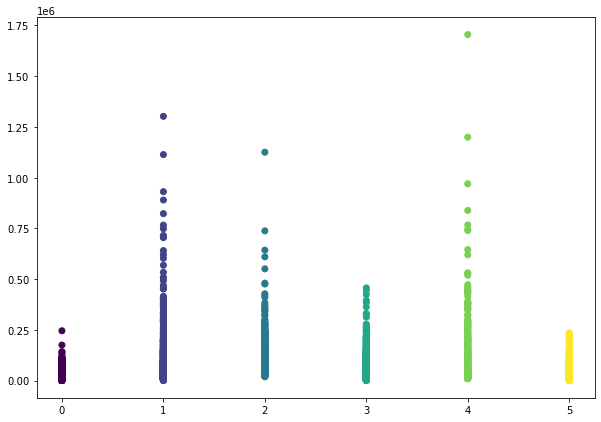

In [54]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline6['clusters6id'],airline6['Balance'], c=clusters6.labels_) 


# DBSCAN Clustering

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [56]:
# Import Dataset
airline = pd.read_csv(r'C:\Users\HP\Downloads\Excel Downloaded files\EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [57]:
airline.drop(['ID#','Balance','Bonus_trans','Flight_trans_12','Days_since_enroll','Award?'], axis=1, inplace=True)

In [58]:
airline.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo
0,0,1,1,1,174,0
1,0,1,1,1,215,0
2,0,1,1,1,4123,0
3,0,1,1,1,500,0
4,0,4,1,1,43300,2077


<AxesSubplot:>

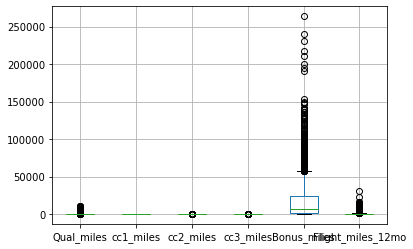

In [59]:
airline.boxplot()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

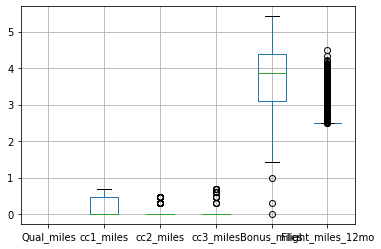

In [60]:
airline.apply(np.log10).boxplot()

In [61]:
array = airline.values
array

array([[    0,     1,     1,     1,   174,     0],
       [    0,     1,     1,     1,   215,     0],
       [    0,     1,     1,     1,  4123,     0],
       ...,
       [    0,     3,     1,     1, 25447,     0],
       [    0,     1,     1,     1,   500,   500],
       [    0,     1,     1,     1,     0,     0]], dtype=int64)

In [62]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [64]:
X

array([[-0.18629869, -0.76957841, -0.09824189, -0.06276658, -0.70278627,
        -0.32860326],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658, -0.7010884 ,
        -0.32860326],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658, -0.5392527 ,
        -0.32860326],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, -0.06276658,  0.3438037 ,
        -0.32860326],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658, -0.68928615,
         0.0285309 ],
       [-0.18629869, -0.76957841, -0.09824189, -0.06276658, -0.70999185,
        -0.32860326]])

In [65]:
#min_samples=4
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=3)

In [66]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [67]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [68]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,0
3995,0
3996,2
3997,0


In [70]:
clustered = pd.concat([airline, cl], axis=1)
clustered 

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo,cluster
0,0,1,1,1,174,0,0
1,0,1,1,1,215,0,0
2,0,1,1,1,4123,0,0
3,0,1,1,1,500,0,0
4,0,4,1,1,43300,2077,1
...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,200,0
3995,0,1,1,1,981,0,0
3996,0,3,1,1,25447,0,2
3997,0,1,1,1,500,500,0


In [71]:
clustered[clustered['cluster'] == -1]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo,cluster
8,0,3,2,1,1753,3850,-1
45,967,1,1,1,23600,2000,-1
65,0,3,1,1,33767,5550,-1
70,5031,2,1,1,15436,1150,-1
94,0,5,1,1,110859,2950,-1
...,...,...,...,...,...,...,...
3883,0,5,1,1,190160,0,-1
3897,2954,3,1,1,18218,2500,-1
3911,2273,1,1,1,8104,4104,-1
3917,0,4,1,1,65510,6349,-1


In [72]:
clustered.mean()

Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Flight_miles_12mo      460.055764
cluster                  1.143036
dtype: float64

In [73]:
clustered.sort_values('cluster')

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo,cluster
1999,1452,5,1,1,97997,350,-1
3633,4877,1,1,1,4794,1194,-1
1052,1896,4,1,1,38635,0,-1
2058,0,1,1,1,11408,11408,-1
1364,0,5,1,1,98535,2550,-1
...,...,...,...,...,...,...,...
3751,0,3,1,1,17848,3763,21
3362,0,3,1,1,21014,3694,21
2035,6057,1,1,1,3200,600,22
2969,6153,1,1,1,1337,267,22


In [74]:
X.shape

(3999, 6)